In [1]:
import librosa

In [2]:
x, sr = librosa.load('B007.wav')

In [3]:
from audiomentations import AddGaussianSNR

transform = AddGaussianSNR(
    min_snr_db=0.0,
    max_snr_db=20.0,
    p=1.0
)

y = transform(x, sample_rate=16000)

In [ ]:
import IPython.display as ipd

ipd.Audio("B007.wav") # load a local WAV file


In [ ]:
ipd.Audio(y, rate=sr) # load a NumPy array

In [6]:
import numpy as np
import soundfile as sf


# Write out audio as 24bit PCM WAV
sf.write('B007_noisy.wav', y, sr)

In [8]:
import matplotlib.pyplot as plt

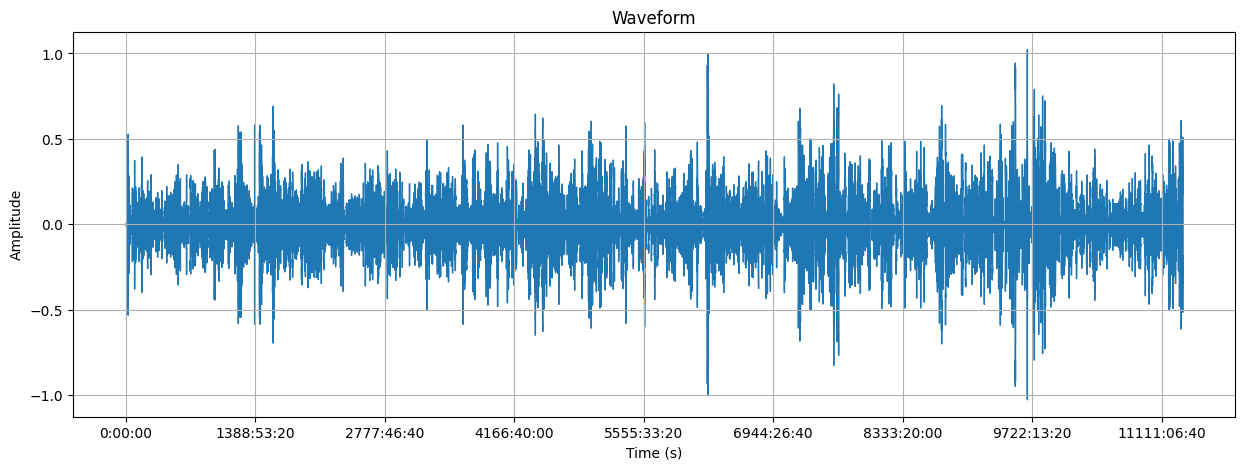

In [9]:
# WAVEFORM
# display waveform
plt.figure(figsize=(15,5))
plt.grid(True)
librosa.display.waveshow(x, sr=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform.png')

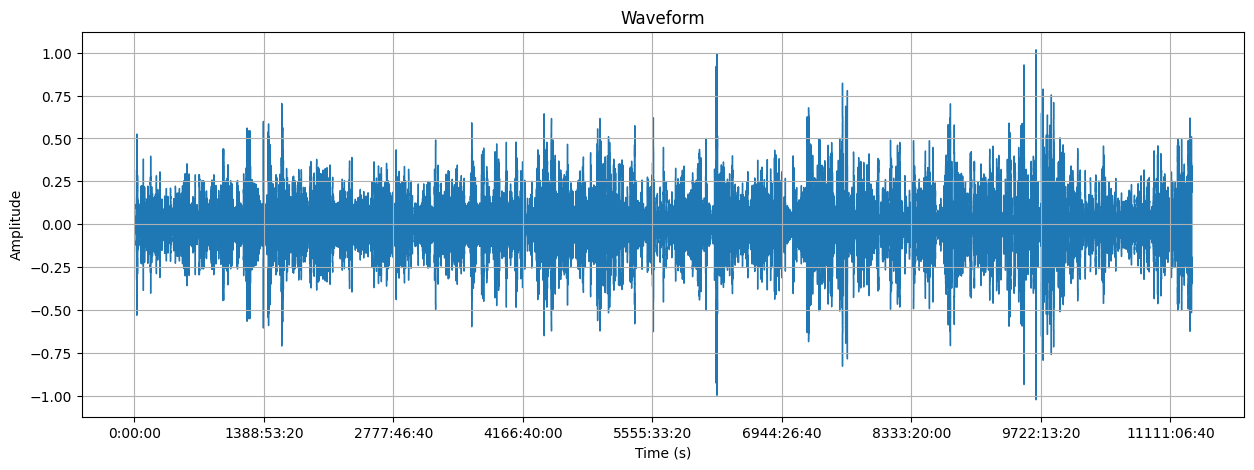

In [14]:
# WAVEFORM
# display waveform
plt.figure(figsize=(15,5))
plt.grid(True)
librosa.display.waveshow(y, sr=1)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Waveform")
plt.savefig('waveform_n.png')

STFT window duration is: 0.023219954648526078s
STFT hop length duration is: 0.011609977324263039s


Text(0.5, 1.0, 'Spectrogram (dB)')

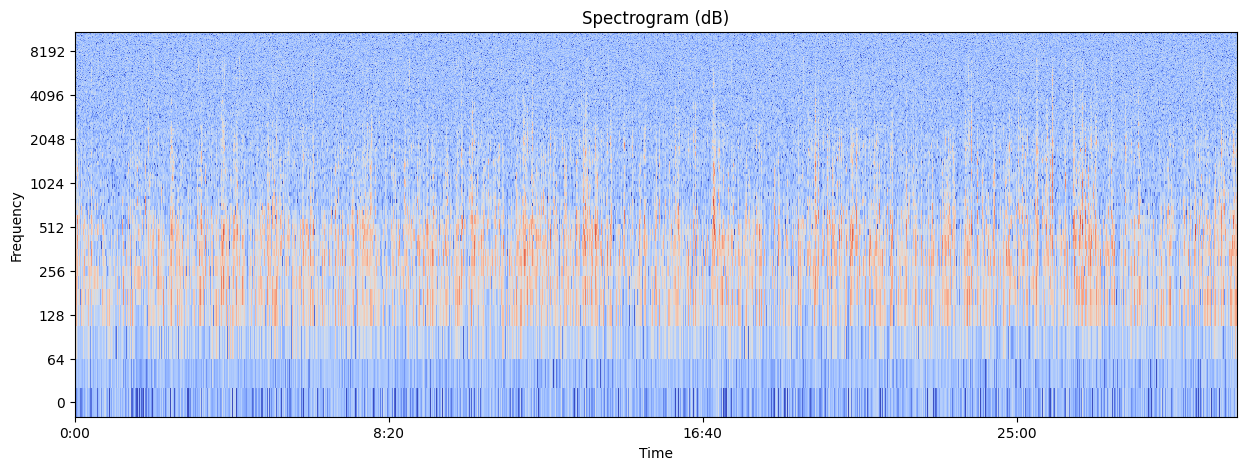

In [18]:
# STFT -> spectrogram
hop_length = 256 # in num. of samples
n_fft = 512 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sr
n_fft_duration = float(n_fft)/sr

print("STFT window duration is: {}s".format(n_fft_duration))
print("STFT hop length duration is: {}s".format(hop_length_duration))


In [ ]:
# perform stft
stft = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft)

# apply logarithm to cast amplitude to Decibels
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(15,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, y_axis='log',x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
#plt.colorbar(format="%+2.0f dB")
plt.title("Log-Spectrogram (dB)")

Text(0.5, 1.0, 'Log-Spectrogram (dB)')

In [ ]:
#Log_MEL_Filter_Bank_Energies (Log_mel_spectrogram)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=128)
log_mel_spectrogram= librosa.power_to_db(mel_spectrogram)

plt.figure(figsize=(15,5))
librosa.display.specshow(log_mel_spectrogram, sr=sr, hop_length=hop_length,x_axis='time',y_axis='mel')
plt.xlabel("Time")
plt.ylabel("Frequency")
#plt.colorbar(format="%+2.0f dB")
plt.title("Log-Mel-Spectrogram (dB)")